Equation of line: mpg = 40.61 + -0.16 * horsepower
Mean Squared Error (MSE): 22.15
Root Mean Squared Error (RMSE): 4.71
R² Score: 0.57


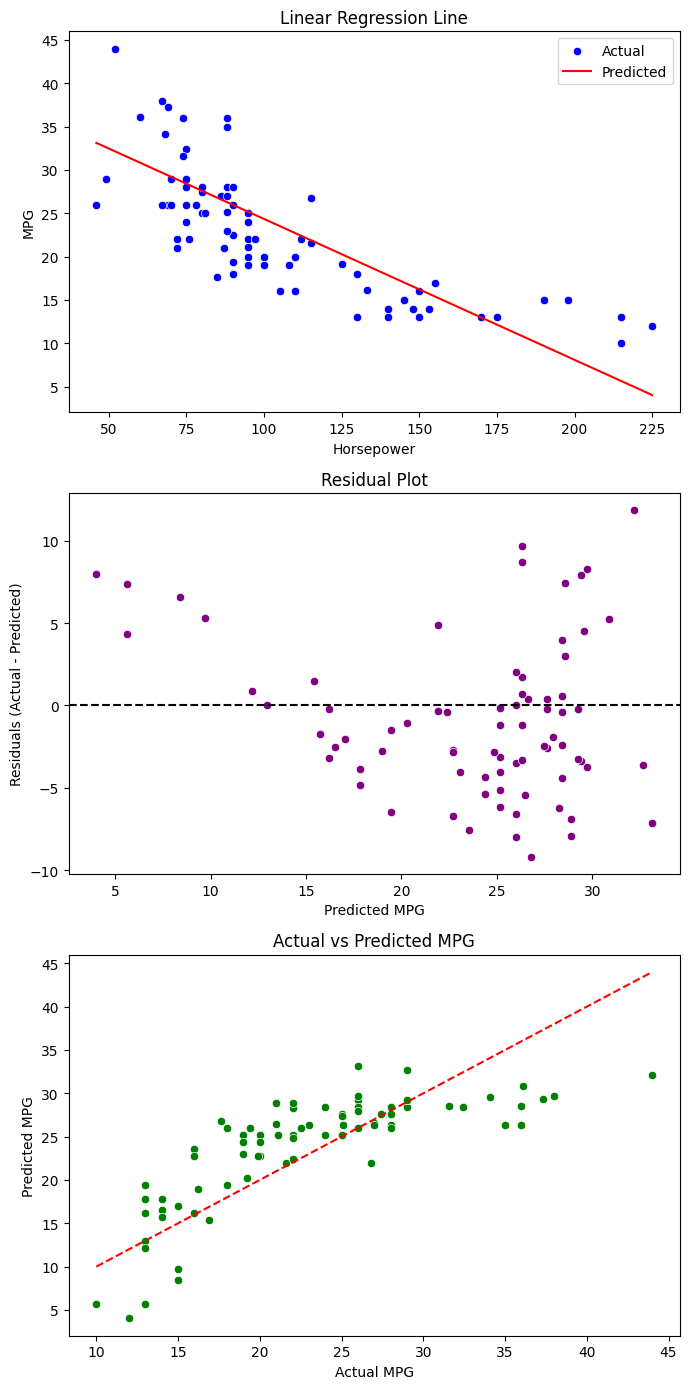

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
data = pd.read_csv(url).dropna()

X = data[['horsepower']]
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

intercept = model.intercept_
slope = model.coef_[0]

print(f"Equation of line: mpg = {intercept:.2f} + {slope:.2f} * horsepower")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(7, 14))

# --- Plot 1: Regression Line ---
plt.subplot(3, 1, 1)
sns.scatterplot(x=X_test['horsepower'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['horsepower'], y=y_pred, color='red', label='Predicted')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Linear Regression Line')
plt.legend()

# --- Plot 2: Residual Plot ---
plt.subplot(3, 1, 2)
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')

# --- Plot 3: Actual vs Predicted ---
plt.subplot(3, 1, 3)
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')

plt.tight_layout()
plt.show()